Connecting to a remote server
=============================

This example demonstrates how to connect to a remote FusionSC server.

In [1]:
import fusionsc as fsc
from fusionsc.devices import w7x

In [2]:
backend = fsc.remote.connect("http://localhost:12345")

In [3]:
fsc.backends.alwaysUseBackend(backend)

In [4]:
fsc.resolve.importOfflineData('../../w7x-op21.fsc')

In [5]:
import numpy as np
phiPlanes = np.linspace(0, 2 / 5 * np.pi, 6, endpoint = False)

# Put more starting points inside the island
rStart = np.concatenate([
    np.linspace(4.5, 4.8, 10, endpoint = False),
    np.linspace(4.8, 5.4, 10)
])
phiStart = np.linspace(0, 2 * np.pi, 5, endpoint = False) + np.pi

# Starting on an r, phi grid allows us to see all 5 islands
rStartG, phiStartG = np.meshgrid(rStart, phiStart, indexing = 'ij')

xStart = rStartG * np.cos(phiStartG)
yStart = rStartG * np.sin(phiStartG)
zStart = 0 * rStartG

startPoints = [xStart, yStart, zStart]

In [6]:
field = w7x.standard()

# Let's cheapen our calculation a bit for demonstration
grid = w7x.defaultGrid()
grid.nR = 64
grid.nZ = 64
grid.nPhi = 32

C:\Daten\repos\fsc\src\python\fusionsc\wrappers.py:144: UserWarning: The function fusionsc.devices.w7x.defaultGrid is part of the unstable API. It might change or get removed in the near future. While unlikely, it might also not be compatible across client/server versions.
  warnings.warn(f"The function {f.__module__}.{f.__qualname__} is part of the unstable API. It might change or get removed in the near future. While unlikely, it might also not be compatible across client/server versions.")


In [7]:
pcPoints = fsc.flt.poincareInPhiPlanes(
    startPoints, field, phiPlanes, 200,
    grid = grid,
    distanceLimit = 1e3
)

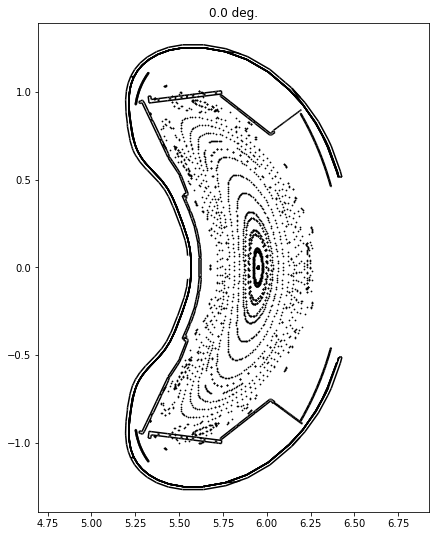

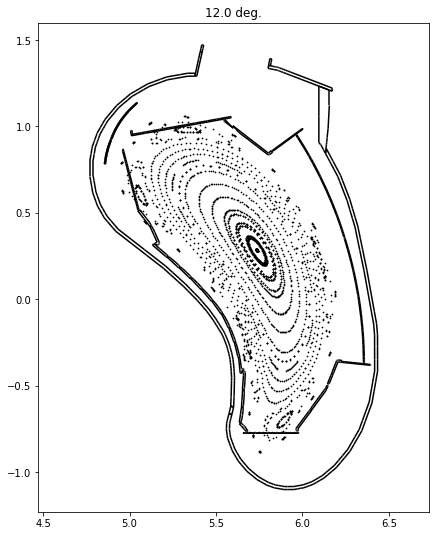

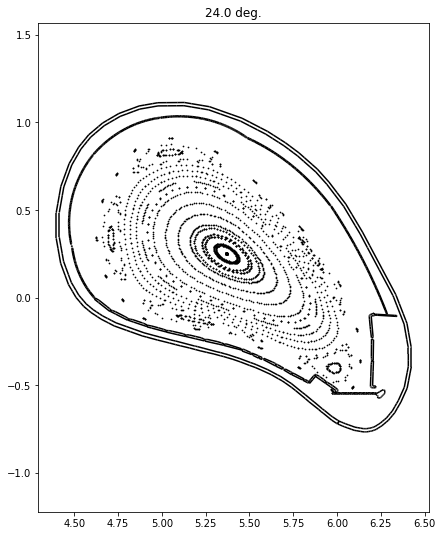

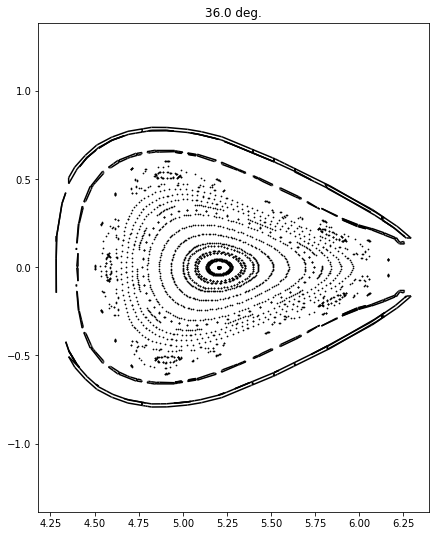

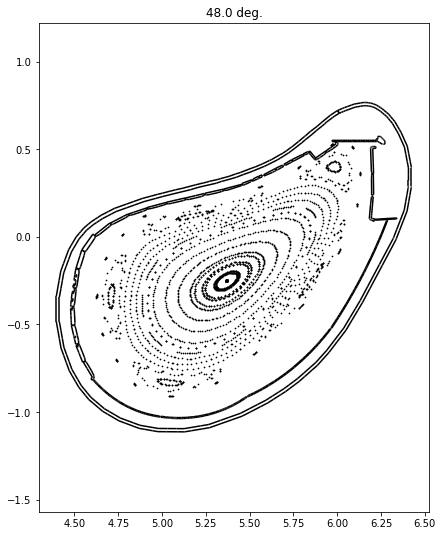

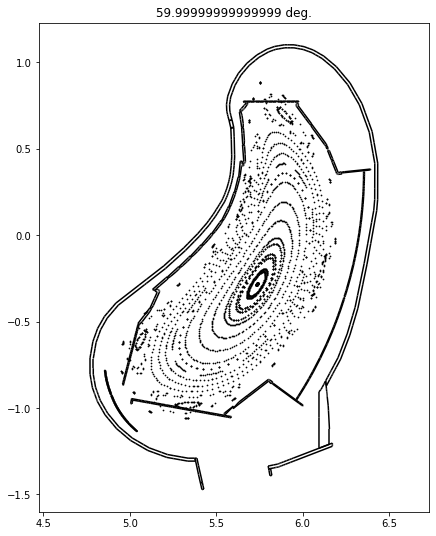

In [8]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({'font.size': 22})

geometry = w7x.op21Geometry().merge()

for iPhi, phi in enumerate(phiPlanes):
    x, y, z, cLenF, cLenB = pcPoints[:, iPhi, :, :].reshape([5, -1])
    r = np.sqrt(x**2 + y**2)
    
    # Negative connection lengths indicate that the line segment going through
    # the point in that direction is not terminated by collision (e.g. it left
    # the grid or hit the distance limit)
    mask = np.logical_and(cLenF > 0, cLenB > 0)
    mask2 = np.logical_and(cLenF < 0, cLenB < 0)
    
    cLen = cLenF + cLenB
    
    plt.figure(figsize = (7, 9))
    plt.title(str(np.degrees(phi)) + ' deg.')
    #plt.scatter(r[mask], z[mask], c = cLen[mask], norm = matplotlib.colors.LogNorm(), s = 1)
    #plt.colorbar(label = 'Connection length [m]')
    plt.scatter(r[mask2], z[mask2], c = 'k', s = 0.5)
    
    geometry.plotCut(phi, edgecolors = 'k')
    plt.axis('equal')

In [9]:
dir(fsc.capnp)

['AnyBuilder',
 'AnyPointer',
 'AnyReader',
 'Bool',
 'Builder',
 'CallContext',
 'Capability',
 'CapabilityClient',
 'CapabilityServer',
 'Constant',
 'Data',
 'DataBuilder',
 'DataReader',
 'DataReaderOrBuilder',
 'Enum',
 'EnumSchema',
 'FieldDescriptor',
 'Float32',
 'Float64',
 'Int16',
 'Int32',
 'Int64',
 'Int8',
 'InterfaceSchema',
 'List',
 'ListBuilder',
 'ListCommon',
 'ListReader',
 'ListSchema',
 'Object',
 'Reader',
 'Schema',
 'Struct',
 'StructBuilder',
 'StructPipeline',
 'StructReader',
 'StructSchema',
 'Text',
 'TextBuilder',
 'TextReader',
 'TextReaderOrBuilder',
 'Type',
 'UInt16',
 'UInt32',
 'UInt64',
 'UInt8',
 'Void',
 '_ListPrototype',
 '_MethodDict',
 '_MethodInfo',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_unpickleBuilder',
 '_unpickleEnum',
 '_unpickleReader',
 '_unpickleRef']

In [14]:
fsc.capnp.List[.Reader

AttributeError: 'fusionsc.native.capnp._ListPrototype' object has no attribute 'Reader'